<h1 style="color:#f56c42;">
    EDA on Used Cars for a Dealership
</h1>


<h4>Dataset Available on Kaggel: https://www.kaggle.com/datasets/rosin9/used-car-price-prediction-dataset.

<h2>Introduction:</h2>





This project performs an exploratory data analysis (EDA) on a dataset of used cars, originally sourced from Kaggle. The goal is to simulate a real-world consultancy scenario for a car dealership, helping them uncover pricing trends and patterns across brands, fuel types, and locations.

The client is a used car dealership that also offers rentals to corporate clients. Their key challenge is pricing — they want to avoid overpricing or underpricing vehicles, which can lead to losses or inventory pile-up. 

This analysis aims to provide pricing insights based on historical sales data, car specifications, and customer trends.


The dataset of historical sales and description of cars are used in this data analysis. These dataset have the price of many cars and their respective descriptive informations such as brand, model, model year, mileage, fuel type, engine specifications, and transmission type.

<h2>Data_Exploration:</h2>

<h2 style="color:#9d36eb;">Step 0: Importing Libraries and Loading the .xlsx file Dataset</h2>

In [9]:
# Importing the necessary libraries required for Explanatory Data Analysis
import pandas as pandas
import numpy as numpy
import matplotlib.pylab as matplot
import seaborn as seaborn

#Importing the warning package to ignore the warning message that pops up during inplace=True
import warnings
warnings.filterwarnings('ignore')

# Setting the style of the appearance of displayed plots to "ggplot"
matplot.style.use("ggplot")

# Setting the max no of columns to display to 20
pandas.set_option("display.max_columns", 60)

import re


<h4>Default settings that we need before we proceed further</h4>

In [11]:
# Setting the plots to display in same notebook
%matplotlib inline

In [12]:
# Setting the style of the appearance of displayed plots to 'ggplot'
matplot.style.use('ggplot')

In [13]:
# Setting the max no of columns to display to 20
pandas.set_option('display.max_columns', 20)

**Loading the Dataset**

In [15]:
# Loading a .csv dataset file into a pandas dataFrame using .read_csv()
df_usedcar_data = pandas.read_csv("../M504 AI and Applications/Cars_Data.csv",low_memory=False)

The above code will create instance in the name of "df_usedcar_data" from using the function read csv from pandas.

In [17]:
#Copying the dataset for further processing
df_orginal = df_usedcar_data.copy()

Copying the dataset to preserve orginal dataset for any necessary propose.

<h2 style="color:#9d36eb;">Step 1: Understanding the Dataset</h2>

Now We check the data dimensions using .shape attribute, Additionally we can using .info() to perfom the same.

In [21]:
print(df_orginal.shape)
print(f"The no of Columns in dataset: {df_orginal.shape[1]}")
print(f"The no of Rows in dataset: {df_orginal.shape[0]}")

(4009, 12)
The no of Columns in dataset: 12
The no of Rows in dataset: 4009


Now to better understand our data, lets check out header of the data along with the data types. i will be displying in dataframe using .to_frame()method

In [23]:
df_header_datatype = df_orginal.dtypes.to_frame()
df_header_datatype.rename(columns = { 0:"Header Data Type"},inplace=True)
df_header_datatype

,Header Data Type
brand,object
model,object
model_year,int64
milage,object
fuel_type,object
engine,object
transmission,object
ext_col,object
int_col,object
accident,object


From the Table we can observer that Price column data type is object which we have to change it to float as. Aditionally we need to change the coloumn header name according to our convention and redability. I am directly assigning the columns name using . columns attribute with the convient naming conventions.

In [25]:
#Columns name of the dataset is renamed
df_orginal.columns = ["Car_Manufacturing_Brand",
                     "Car_Model_Description",
                     "Car_Manufacturing_Year",
                     "Car_Milage_in_Miles",
                     "Car_Fuel_Type",
                     "Car_Engine_Description",
                     "Car_Transmission_System",
                     "Car_Body_Color",
                     "Car_Int_Color",
                     "Car_Accident_Details",
                     "Car_Title_Details",
                     "Car_Amount_in_Dollors"]


In [26]:
df_orginal

,Car_Manufacturing_Brand,Car_Model_Description,Car_Manufacturing_Year,Car_Milage_in_Miles,Car_Fuel_Type,Car_Engine_Description,Car_Transmission_System,Car_Body_Color,Car_Int_Color,Car_Accident_Details,Car_Title_Details,Car_Amount_in_Dollors
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


**Data_Characteristics**

This above dataset have crucial information, which is especially helpful in predicting a used car selling price. 


    




<span style="color:blue; text-align: justify;">

**Categorical Data:**

<li>Car_Manufacturing_Brand
<li>Car_Model_Description
<li>Car_Fuel_Type
<li>Car_Engine_Description
<li>Car_Transmission_System
<li>Car_Body_Color
<li>Car_Int_Color
<li>Car_Accident_Details - Binary
<li>Car_Title_Details - Binary
</li>
</span>

<span style="color:red; text-align: justify;">

**Numeric Continuous Data:**
<li>Car_Manufacturing_Year
<li>Car_Milage_in_Miles
<li>Car_Amount_in_Dollors

**Checking for null and duplicate value**

After having the basic understanding of the data, Now the first step i will be doing is to check duplicates and  null values in the dataset. Sometimes Null valuve will be ?,NAN values. The below snipset will check the value "?" is present in dataset using .sum() attribute for the individual column and another.sum() will be to find the over all value by summing them.

In [33]:
#Does the dataset have ? values
qm_values = (df_orginal == "?").sum().sum()
print(qm_values)

0


In [34]:
#Does it have duplicate values in dataset
print(f"It have {df_orginal.duplicated(keep = "first").sum()}  Duplicate Rows in the Dataset")

It have 0  Duplicate Rows in the Dataset


Using.duplicated and isna, detecting the duplicate values and missing or null values.

In [36]:
#Checking for null values in dataset
df_orginal.isna().sum()

Car_Manufacturing_Brand      0
Car_Model_Description        0
Car_Manufacturing_Year       0
Car_Milage_in_Miles          0
Car_Fuel_Type              170
Car_Engine_Description       0
Car_Transmission_System      0
Car_Body_Color               0
Car_Int_Color                0
Car_Accident_Details       113
Car_Title_Details          596
Car_Amount_in_Dollors        0
dtype: int64

I will using horizontal bar plot to plot the missing vaue percentage using matplotlib and seaborn module packages.

In [38]:
#visualising the percentage of missing values

missing_values = (df_orginal.isna().sum()/df_orginal.shape[0]*100).plot(kind = "barh",color ="blue")
matplot.xlim(0,25)
matplot.ylabel("Columns Title")
matplot.xlabel("Missing Values %")
matplot.title("Percentage of Missing Value")
matplot.figure(figsize=(40, 20))
for data_columns in missing_values.containers:
    missing_values.bar_label(data_columns, fmt="%.2f%%")


We can observe that there are null values in three column and we have to deal with the null values first before we proceed further.

<h2 style="color:#9d36eb;">Step 2: Data cleaning and Visulization</h2>

In [41]:
#Changing Car_Amount_in_Dollors Column Datatype to int
def dollorsign_remove(data):
    amount_in_dollor = str(data).replace("$", "").replace(",", "").strip()
    return int(amount_in_dollor)

df_orginal["Car_Amount_in_Dollors"] = df_orginal["Car_Amount_in_Dollors"].apply(dollorsign_remove)
df_orginal["Car_Amount_in_Dollors"]=df_orginal["Car_Amount_in_Dollors"].astype("float")

we observe using dtypes that the amount must be numerical, and by visualizing the datas in colum we can see that it has some string $ sing, so i am definig a function dollorsig_remove that use.replace and .strip attributes od string and calling the function on each values of the colum to retun integer. Finally replacing corresponding values with the return values and explictly converting it in to float type using .astype attribute.

Similarly, I define another function to remove "mi" from Milage colum and explictly converting it in to integer type

In [43]:
#Changing Car_Milage_in_Miles Column Datatype to int
def remove_mi_from_milage(data):
    mi_in_miles = str(data).replace(" mi.", "").replace(",", "").strip()
    return int(mi_in_miles)

df_orginal["Car_Milage_in_Miles"] = df_orginal["Car_Milage_in_Miles"].apply(remove_mi_from_milage)
df_orginal["Car_Milage_in_Miles"]=df_orginal["Car_Milage_in_Miles"].astype("int")

Now I will be grouping the diffrent Manufaturing band with their average amount in dollors using .groupby and .mean attribute, later i sort them using.sort_values. To visulize i plot barchart keeping x axis diffrent brands and y axis amout.

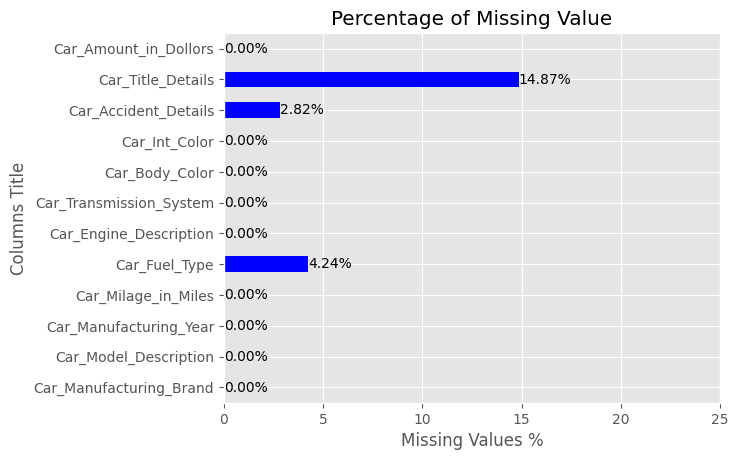

<Figure size 4000x2000 with 0 Axes>

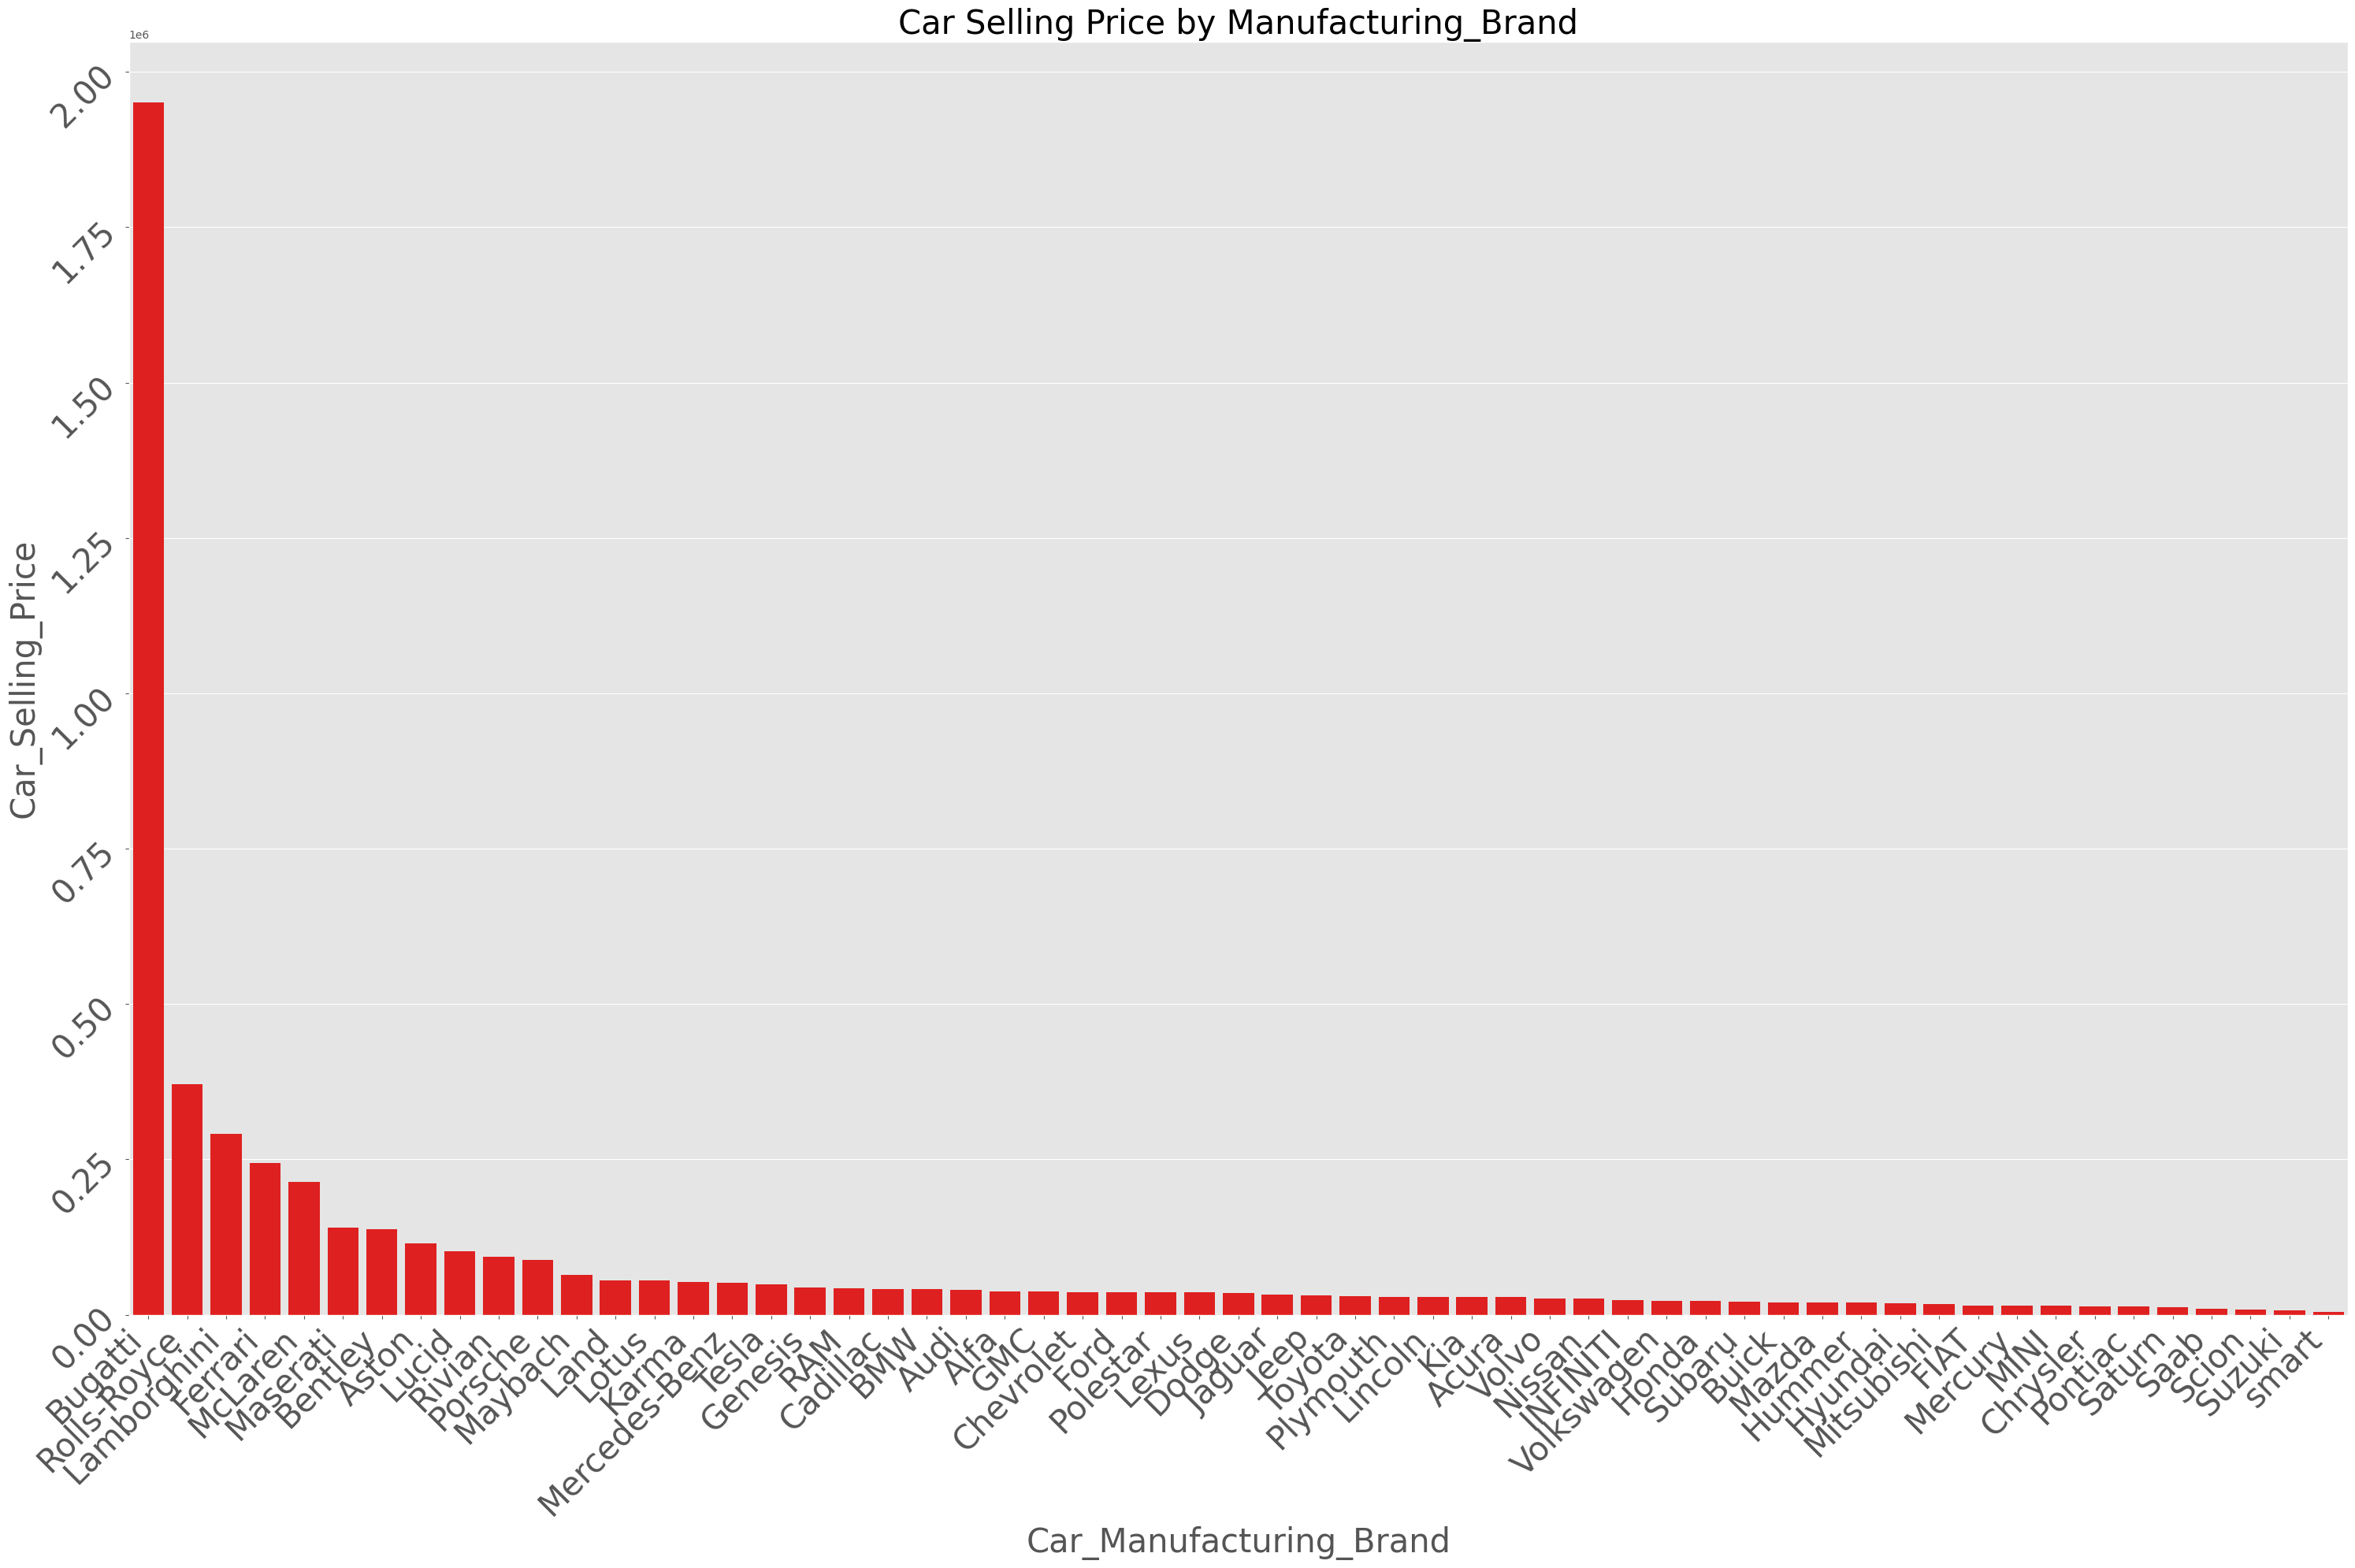

In [45]:
brand_amount = df_orginal.groupby("Car_Manufacturing_Brand")["Car_Amount_in_Dollors"].mean().reset_index()
brand_amount_df = brand_amount.sort_values(by="Car_Amount_in_Dollors", ascending=False)

matplot.figure(figsize=(30, 20))
seaborn.barplot(x=brand_amount_df["Car_Manufacturing_Brand"], y=brand_amount_df["Car_Amount_in_Dollors"], color="red", errorbar=None)
matplot.title("Car Selling Price by Manufacturing_Brand",fontsize=30)
matplot.xlabel("Car_Manufacturing_Brand",fontsize=30)
matplot.ylabel("Car_Selling_Price",fontsize=30)
matplot.xticks(rotation=45, ha="right", fontsize=30) 
matplot.yticks(rotation=45, ha="right", fontsize=30)  
matplot.tight_layout()
matplot.show()

When we have a missing values in the dataset or not with the proper values or format it is obvious to handel them. Droping them is an option, so i will be droping them by replacing it NAN values and drop it using dropna, as axis = 0 meaning only row. Later i will be ploting  distribution of the values using pie chart.

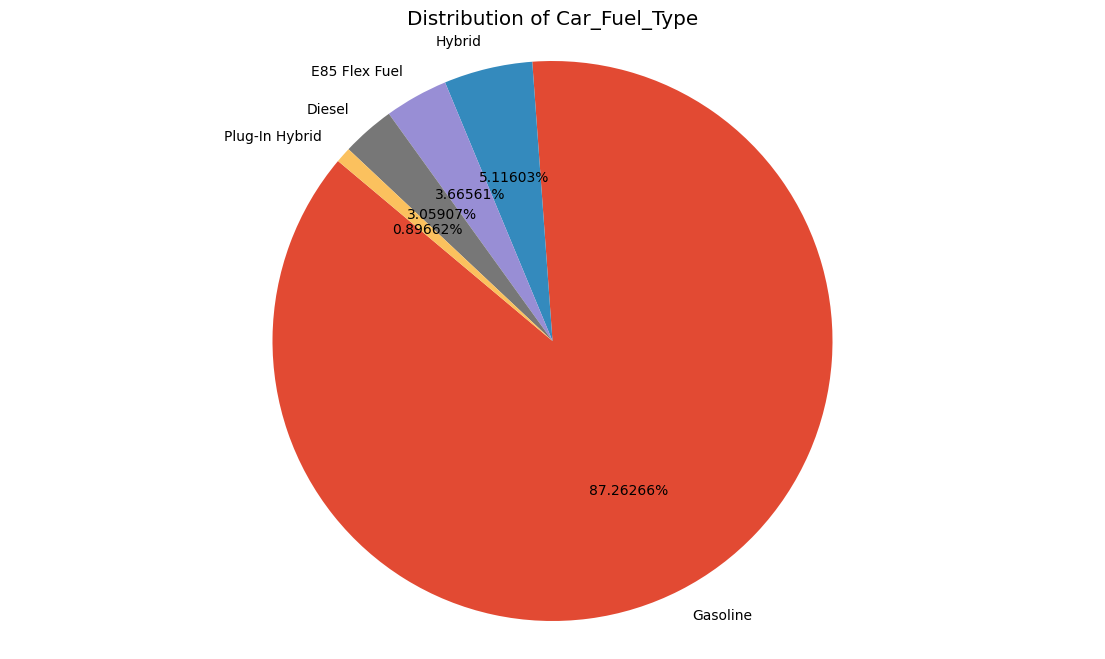

In [47]:
#Dealing with the missing Values in Car_Fuel_Type
""" #Droping the rows containgis not a good idea, as 
    Fuel category is important variable."""

df_orginal["Car_Fuel_Type"] = df_orginal["Car_Fuel_Type"].replace("–",numpy.nan).replace("not supported",numpy.nan)
df_orginal = df_orginal.dropna(subset=["Car_Fuel_Type"], axis=0)

#Distribution of Car_Fuel_Type
matplot.figure(figsize=(14,8 ))
pie_data = df_orginal["Car_Fuel_Type"].value_counts()
matplot.pie(pie_data,labels=pie_data.index,autopct="%1.5f%%", startangle=140)
matplot.title("Distribution of Car_Fuel_Type")
matplot.axis("equal")
matplot.show()



For th Car Accident Deatails column null values, droping the row is not an good opition, as other corresponding columns value will provide aditional insights, so i will be replacing it with most frequent values of the columns using.mode attribute. later ploting the distibuting using bar chart.

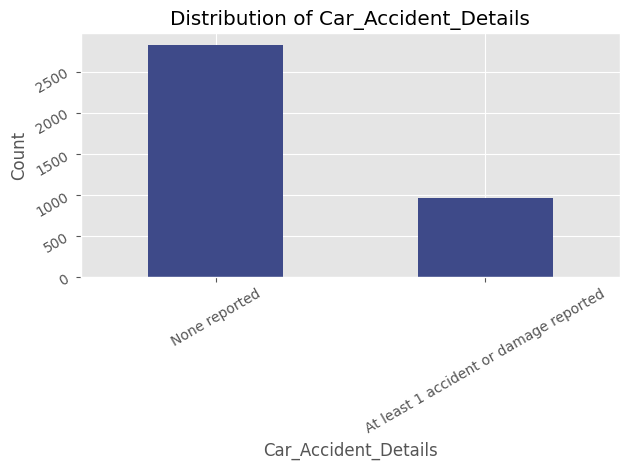

In [49]:
#Droping the rows is not a good idea, so lets replace it by most frquent value
df_orginal["Car_Accident_Details"] = df_orginal["Car_Accident_Details"].replace(numpy.nan,df_orginal["Car_Accident_Details"].mode()[0])


#Distribution of "Car_Accident_Details"

df_orginal["Car_Accident_Details"].value_counts().plot(kind= "bar",color="#3E4A89")
matplot.title("Distribution of Car_Accident_Details")
matplot.ylabel("Count")
matplot.yticks(rotation=30, ha="right") 
matplot.xticks(rotation=30)  
matplot.tight_layout()
matplot.show()

Similarlly, I will be replacing the null value with "No" string for Car_title details column as here also droping the column is not a good idea. Later i will be plotting all three numerical values histogram to see their data distribution.

In [51]:
#Dealing with the missing Values in Car_Title_Details
#Droping the rows is not a good idea, so lets replace it by NO value
df_orginal["Car_Title_Details"] = df_orginal["Car_Title_Details"].replace(numpy.nan,"No")

hist_col_continious = ["Car_Manufacturing_Year",
"Car_Milage_in_Miles",
"Car_Amount_in_Dollors"]

for i, hist_col in enumerate(hist_col_continious):
    matplot.figure(figsize=(5,5 ))
    matplot.hist(df_orginal[hist_col], bins=100, color='green', alpha=0.7)
    matplot.title(f'Histogram of {hist_col}')
    matplot.xlabel(hist_col)
    matplot.ylabel('Frequency')


In [52]:
#Revalidting the null vales are handled
df_orginal.isna().sum()

Car_Manufacturing_Brand    0
Car_Model_Description      0
Car_Manufacturing_Year     0
Car_Milage_in_Miles        0
Car_Fuel_Type              0
Car_Engine_Description     0
Car_Transmission_System    0
Car_Body_Color             0
Car_Int_Color              0
Car_Accident_Details       0
Car_Title_Details          0
Car_Amount_in_Dollors      0
dtype: int64

Checking the distribution of Car brands and the manufacturing years using bar plot.

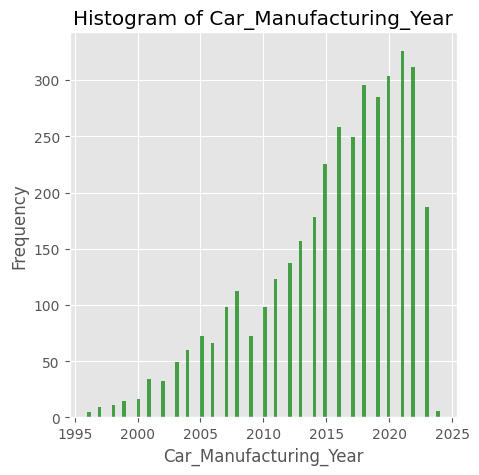

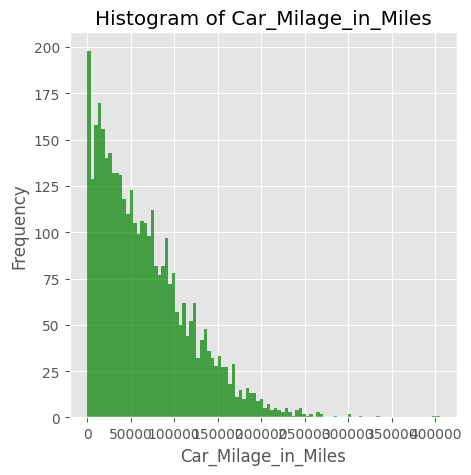

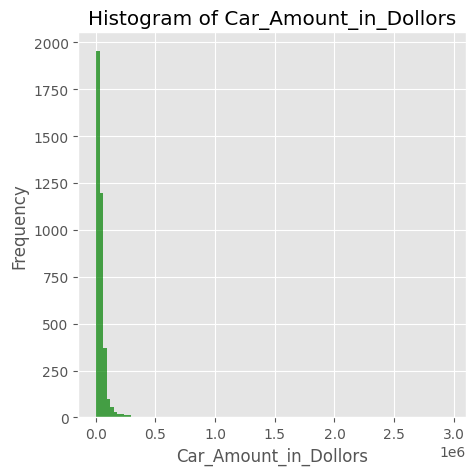

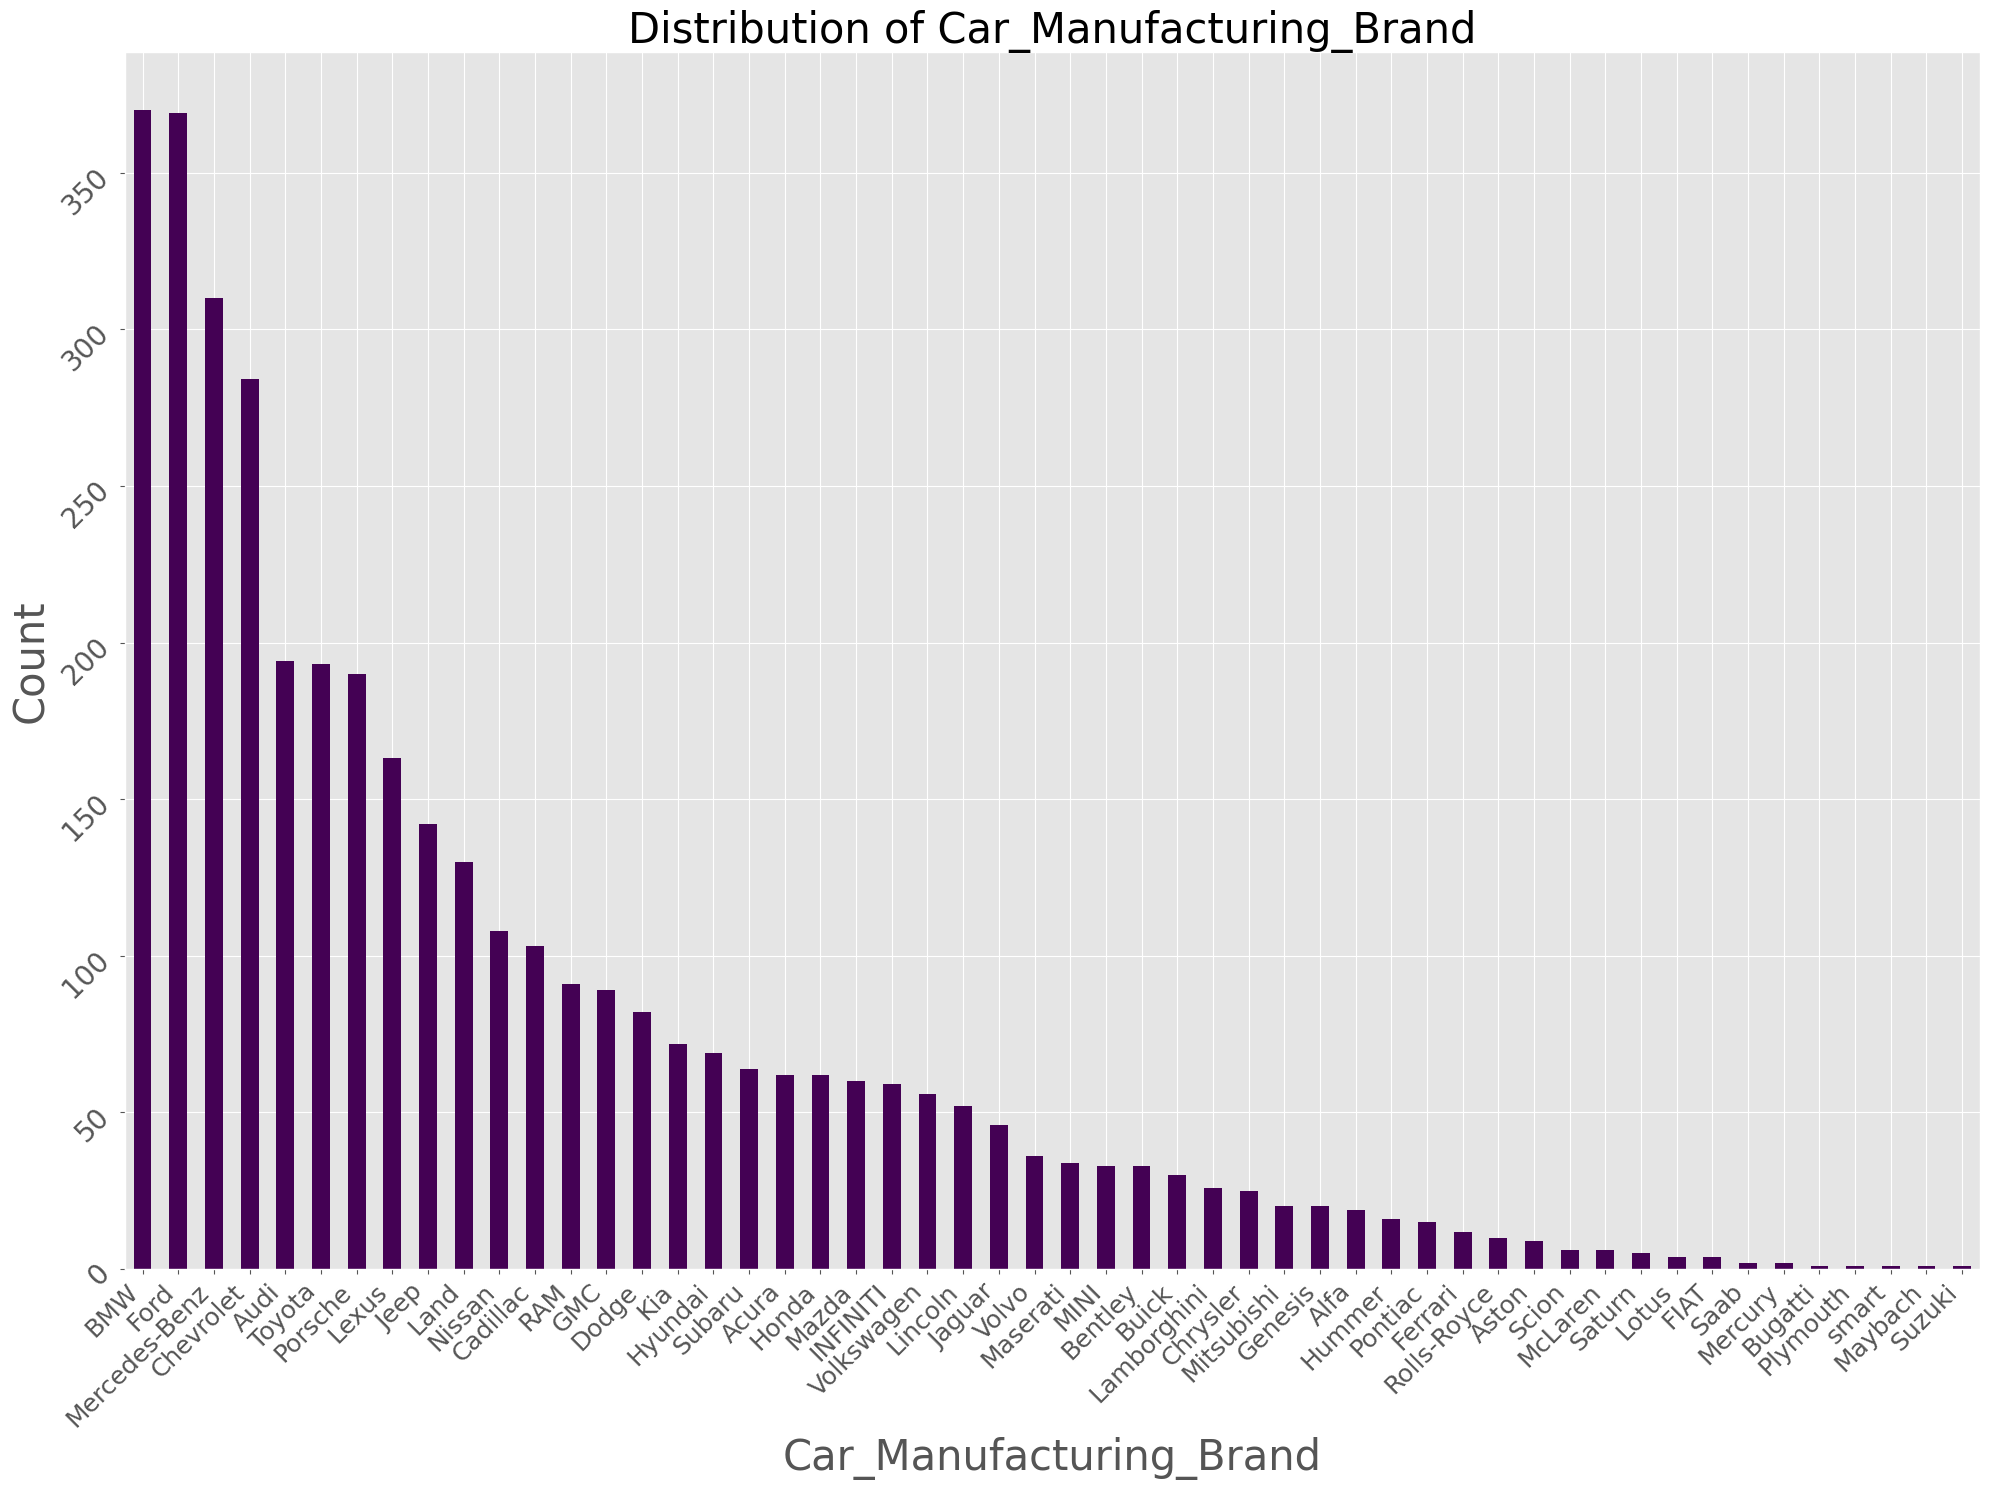

In [54]:
#Distribution of Car_Manufacturing_Brand
matplot.figure(figsize=(20, 15))
df_orginal["Car_Manufacturing_Brand"].value_counts().plot(kind= "bar",color="#440154")
matplot.title("Distribution of Car_Manufacturing_Brand",fontsize=30)
matplot.xlabel("Car_Manufacturing_Brand",fontsize=30)
matplot.ylabel("Count",fontsize=30)
matplot.xticks(rotation=45, ha="right", fontsize=18) 
matplot.yticks(rotation=45, ha="right", fontsize=20)  
matplot.tight_layout()
matplot.show()


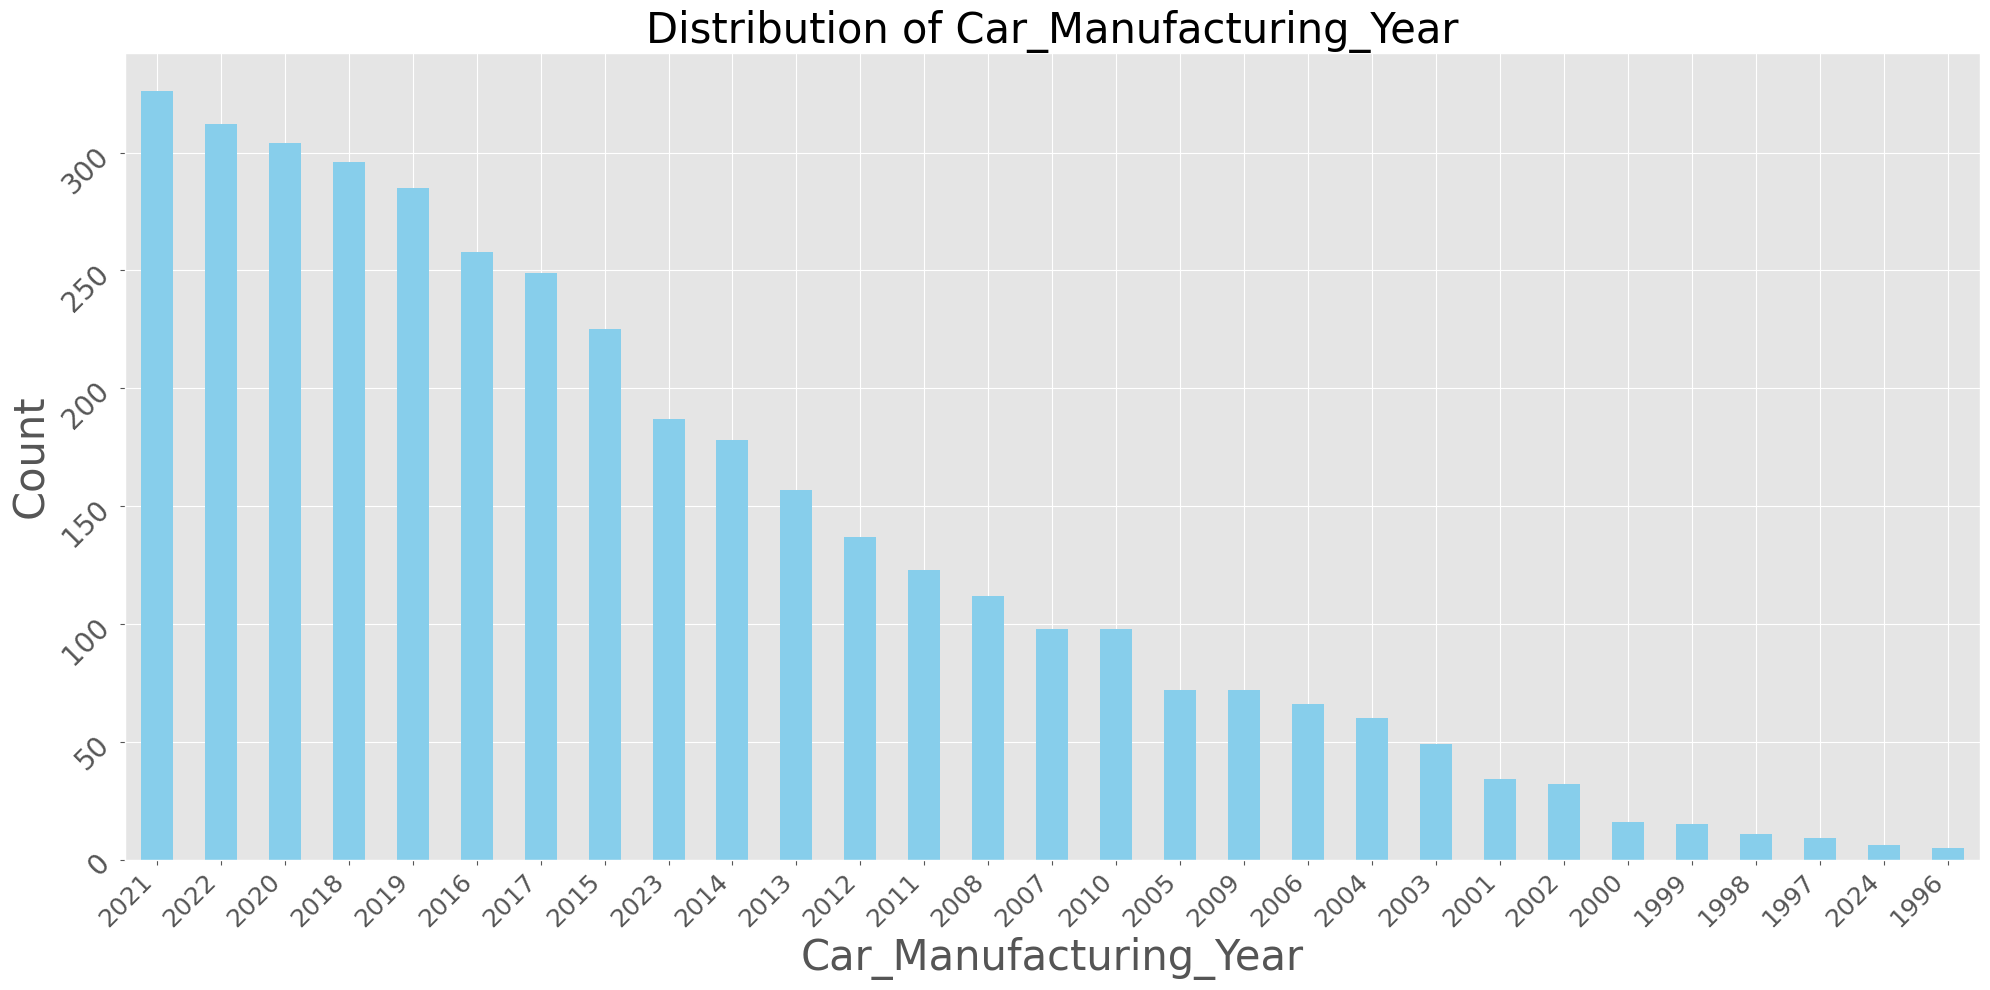

In [55]:
#Distribution of Car_Manufacturing_Year
matplot.figure(figsize=(20, 10))
df_orginal["Car_Manufacturing_Year"].value_counts().plot(kind= "bar",color="skyblue")
matplot.title("Distribution of Car_Manufacturing_Year",fontsize=30)
matplot.xlabel("Car_Manufacturing_Year",fontsize=30)
matplot.ylabel("Count",fontsize=30)
matplot.xticks(rotation=45, ha="right", fontsize=18) 
matplot.yticks(rotation=45, ha="right", fontsize=20)  
matplot.tight_layout()
matplot.show()

In [56]:
my_used_car_data_unique_values = df_orginal.nunique()
my_used_car_data_dtypes = df_orginal.dtypes
my_used_car_data_unique_dtype = pandas.DataFrame({"nunique":my_used_car_data_unique_values,
                                              "dtypes":my_used_car_data_dtypes})
my_used_car_data_unique_dtype

,nunique,dtypes
Car_Manufacturing_Brand,52,object
Car_Model_Description,1800,object
Car_Manufacturing_Year,29,int64
Car_Milage_in_Miles,2686,int64
Car_Fuel_Type,5,object
Car_Engine_Description,1095,object
Car_Transmission_System,58,object
Car_Body_Color,308,object
Car_Int_Color,153,object
Car_Accident_Details,2,object


The above code will be telling using the no of unique values in each column with the data types for glance. Using describe, i will be looking at the descriptive staticts.

In [58]:
df_orginal.describe(include="all")

,Car_Manufacturing_Brand,Car_Model_Description,Car_Manufacturing_Year,Car_Milage_in_Miles,Car_Fuel_Type,Car_Engine_Description,Car_Transmission_System,Car_Body_Color,Car_Int_Color,Car_Accident_Details,Car_Title_Details,Car_Amount_in_Dollors
count,3792,3792,3792.000000,3792.000000,3792,3792,3792,3792,3792,3792,3792,3.792000e+03
unique,52,1800,NaN,NaN,5,1095,58,308,153,2,2,NaN
top,BMW,M3 Base,NaN,NaN,Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,NaN
freq,370,30,NaN,NaN,3309,52,934,867,1919,2825,3223,NaN
mean,NaN,NaN,2015.456487,66114.991297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.423179e+04
std,NaN,NaN,5.852509,52349.624900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.012376e+04
min,NaN,NaN,1996.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,NaN,NaN,2012.000000,24263.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04
50%,NaN,NaN,2017.000000,54390.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+04
75%,NaN,NaN,2020.000000,95500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.900000e+04


In [59]:
#Car_Manufacturing_Brand
df_orginal["Car_Manufacturing_Brand"].value_counts().to_frame().transpose()


Car_Manufacturing_Brand,BMW,Ford,Mercedes-Benz,Chevrolet,Audi,Toyota,Porsche,Lexus,Jeep,Land,...,Saturn,Lotus,FIAT,Saab,Mercury,Bugatti,Plymouth,smart,Maybach,Suzuki
count,370,369,310,284,194,193,190,163,142,130,...,5,4,4,2,2,1,1,1,1,1


As we have 52 Unique brands, i will be binng each brand in to the categories of Tier-1,Tier-2, Mid-Tier and Eco-Tier, I will be using the google to catogerize trhe each brand. Then writing a function to assign corresponding category values.

Similarlly for fuel type

In [61]:
#Binning the Car Manufacture in to  4 Trading categories
Car_Brand_Categories = {

    "Tier-1_Class": [
        "BMW", "Mercedes-Benz", "Audi", "Porsche", "Lexus", "Jaguar",
        "Maserati", "Bentley", "Rolls-Royce", "Ferrari", "Lamborghini",
        "Bugatti", "Maybach", "McLaren","Aston","Land", "Genesis"],
    
    "Tier-2_Class": [
        "Ford", "Chevrolet", "Toyota", "Cadillac", "INFINITI", "Lincoln",
        "Acura", "Nissan", "Volkswagen","Kia", "Chrysler","Lotus"],
    
    "Mid-Tier": [
        "Honda", "Hyundai", "Subaru", "Mazda", "GMC", "RAM", "Dodge", "Buick",
        "Jeep", "Volvo","Saab"],
    
    "Eco-Tier": [
        "Mitsubishi", "Scion", "FIAT", "Hummer", "Saturn", "Pontiac",
        "Suzuki", "MINI", "Alfa","Scion", "Mercury", "Plymouth", "smart"]
}

#Function to assing the catergories to correspondig values.
def allot_brand_category(car_make):
    for brand_category, car_brands in Car_Brand_Categories.items():
        if car_make in car_brands:
          return brand_category
    return "Failed"

df_orginal["Car_Brand_Category"] =df_orginal["Car_Manufacturing_Brand"].apply(allot_brand_category)

In [62]:
#Replacing the Car_Fuel_Type in to two types
#Internal_Combustion _Engine_Vehicle(ICEVs): Gasoline, Diesel
#Flex_Fuel_Vechicle_(FFVs): E85 Flex Fuel
#Hybrid_Vechiels_(HEVs): Hybrid, Plug-In Hybrid
df_orginal["Car_FuelC"] = df_orginal["Car_Fuel_Type"].copy()
df_orginal["Car_FuelC"] = df_orginal["Car_FuelC"].replace(["Gasoline","Diesel"],"ICEVs").replace(["Hybrid", "Plug-In Hybrid"],"HEVs").replace(["E85 Flex Fuel"],"FFVs")

In [63]:
print(df_orginal["Car_Brand_Category"].value_counts().to_frame())
print()
print(df_orginal["Car_FuelC"].value_counts().to_frame())

                    count
Car_Brand_Category       
Tier-1_Class         1555
Tier-2_Class         1387
Mid-Tier              727
Eco-Tier              123

           count
Car_FuelC       
ICEVs       3425
HEVs         228
FFVs         139


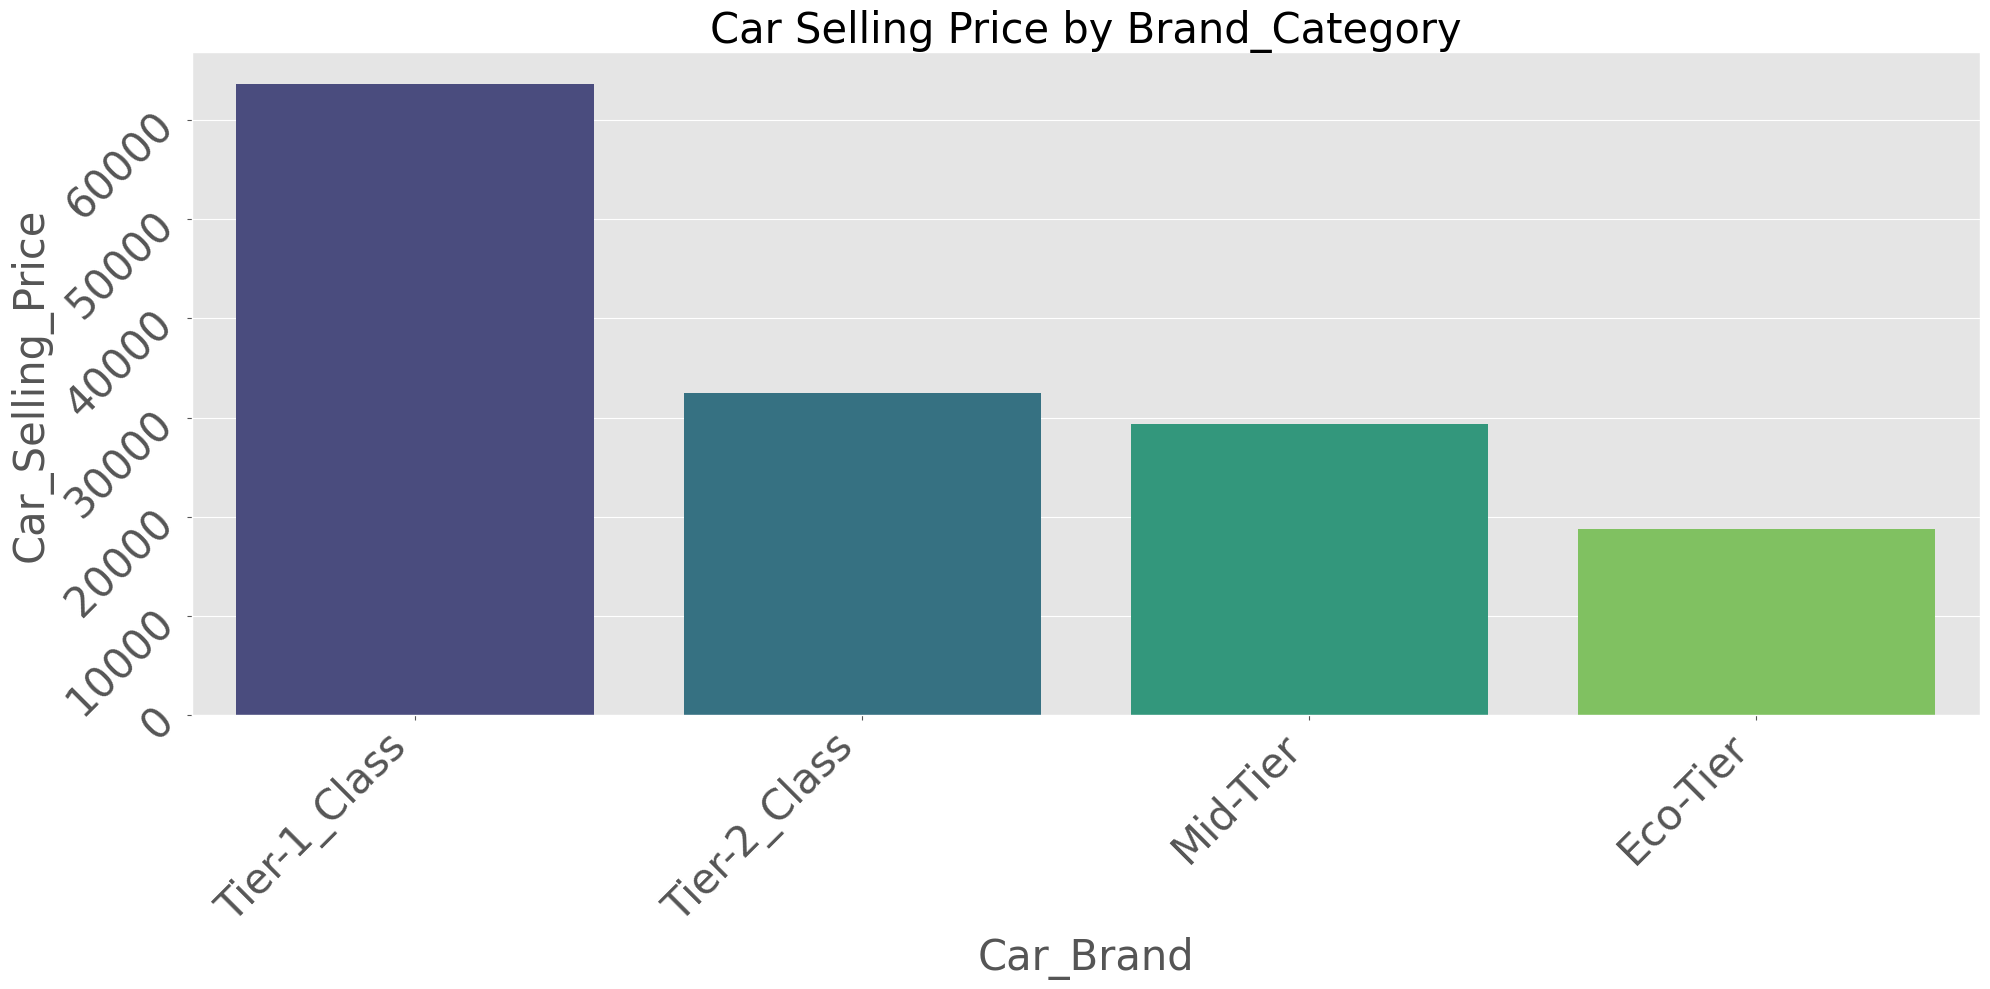

In [64]:
price_brand = df_orginal.groupby("Car_Brand_Category")["Car_Amount_in_Dollors"].mean().reset_index()
price_brand_df = price_brand.sort_values(by="Car_Amount_in_Dollors", ascending=False)

matplot.figure(figsize=(20, 10))
seaborn.barplot(x=price_brand_df["Car_Brand_Category"], y=price_brand_df["Car_Amount_in_Dollors"],  palette='viridis' , errorbar=None)
matplot.title("Car Selling Price by Brand_Category",fontsize=30)
matplot.xlabel("Car_Brand",fontsize=30)
matplot.ylabel("Car_Selling_Price",fontsize=30)
matplot.xticks(rotation=45, ha="right", fontsize=30) 
matplot.yticks(rotation=45, ha="right", fontsize=30)  
matplot.tight_layout()
matplot.show()

The above code snipset will group the each brand category using the average mean of the respective brand catogery, using groupby function and using barchart for visualization.

In [66]:
avg_brand_fuel = df_orginal.groupby(['Car_Brand_Category', 'Car_FuelC'])['Car_Amount_in_Dollors'].mean().reset_index()

seaborn.barplot(x='Car_FuelC', y='Car_Amount_in_Dollors', hue='Car_Brand_Category', data=avg_brand_fuel, palette='Set2')

<Axes: xlabel='Car_FuelC', ylabel='Car_Amount_in_Dollors'>

In [67]:
#Car_Transmission_System
df_orginal["Car_Transmission_System"].value_counts().to_frame().transpose()

Car_Transmission_System,A/T,8-Speed A/T,Transmission w/Dual Shift Mode,6-Speed A/T,6-Speed M/T,Automatic,7-Speed A/T,8-Speed Automatic,10-Speed A/T,5-Speed A/T,...,"Automatic, 8-Spd Sport w/Sport & Manual Modes","Automatic, 10-Spd",6-Speed,"Automatic, 8-Spd Dual-Clutch","Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes","Automatic, 8-Spd PDK Dual-Clutch",CVT-F,8-SPEED AT,"Auto, 6-Spd w/CmdShft",8-Speed Manual
count,934,405,396,362,243,226,209,176,119,85,...,1,1,1,1,1,1,1,1,1,1


The below code snipset will extract som values from each colum and seggrigate it in to Automatic or manual gear type. Additionally it will extract no of gears from the colums values. when we dont find any inputed or search loook up value it will write default values as Manual and Standard no of gears 5

In [69]:
#Grouping and Encoding the Car_Transmission_System in to two types
#Automatic
#Manual

def automatic_manual(gsl):
    if "Auto" in gsl or "Automatic" in gsl or "AT" in gsl or "A/T" in gsl or "CVT" in gsl:
        return "Automatic"
    elif "Manual" in gsl or "Mt" in gsl or "M/T" in gsl or "Dual Shift Mode" in gsl:
        return "Manual"
    return "Manual" #As common geavg_price_combinedar system 

def gear_number(gsl):
    Speed_word = re.search(r"(\d+)-Speed", gsl)
    SPEED_word = re.search(r"(\d+)-SPEED", gsl)
    Spd_word = re.search(r"(\d+)-Spd", gsl)
    if Speed_word:
        return int(Speed_word.group(1))
    elif Spd_word:
        return int(Spd_word.group(1))
    elif SPEED_word:
        return int(SPEED_word.group(1))
    else: return 5 #As Standard Gears
df_orginal["Car_Transmission_Gear_System_Type"] = df_orginal["Car_Transmission_System"].apply(automatic_manual)
df_orginal["Car_Transmission_Gear_Count"] = df_orginal["Car_Transmission_System"].apply(gear_number)

print(df_orginal["Car_Transmission_Gear_System_Type"].value_counts().to_frame())
print()
print(df_orginal["Car_Transmission_Gear_Count"].value_counts().to_frame())

avg_brand_gear = df_orginal.groupby(['Car_Brand_Category', 'Car_Transmission_Gear_Count'])['Car_Amount_in_Dollors'].mean().reset_index()

seaborn.barplot(x='Car_Brand_Category', y='Car_Amount_in_Dollors', hue='Car_Transmission_Gear_Count', data=avg_brand_gear, palette='deep')

                                   count
Car_Transmission_Gear_System_Type       
Automatic                           3012
Manual                               780

                             count
Car_Transmission_Gear_Count       
5                             1866
6                              696
8                              601
7                              255
10                             177
9                              122
4                               72
1                                3


<Axes: xlabel='Car_FuelC', ylabel='Car_Amount_in_Dollors'>

In [70]:
avg_price_gearsystem = df_orginal.groupby(['Car_Brand_Category', 'Car_Transmission_Gear_System_Type'])['Car_Amount_in_Dollors'].mean().unstack()
seaborn.heatmap(avg_price_gearsystem, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Avg Price'})

<Axes: xlabel='Car_Transmission_Gear_System_Type', ylabel='Car_Brand_Category'>

The below code will extract the Horse power value.

In [72]:
#Extracting Horse power from - Car Engine Type
def Hp_fun(engine_data):
    fmt = [
        r"(\d+\.?\d*) ?PS",
        r"(\d+\.?\d*) ?HP",
        r"(\d+\.?\d*) ?Hp",
        r"(\d+\.?\d*) ?horsepower",
        r"(\d+\.?\d*) ?hp",
        r"(\d+\.?\d*) ?[hH][pP]",
    ]
    
    for data in fmt:
        look_value = re.search(data, engine_data)
        if look_value:
            return float(look_value.group(1))
    return None
df_orginal["Car_Engine_HP"] = df_orginal["Car_Engine_Description"].apply(Hp_fun)
#Replacing None Value with Median
df_orginal["Car_Engine_HP"] = df_orginal["Car_Engine_HP"].replace(numpy.nan,df_orginal["Car_Engine_HP"].median())

matplot.figure(figsize=(5,5 ))
matplot.hist(df_orginal["Car_Engine_HP"], bins=100, color='green', alpha=0.7)
matplot.title(f'Histogram of Horse_Power')
matplot.xlabel(hist_col)
matplot.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

The below code will categorize the color in to know 6 category

In [74]:
#Binning the Car Body Color in to  6 color categories
Car_body_colorCategories = {"Red":"Red","Blue":"Blue", 
                        "Black":"Black", "White":"White",
                        "Silver":"Silver", "Other-Color":"Other-Color"}
def assigning_bodycolor_categories(car_color):
    for Clr_Category, body_color in Car_body_colorCategories.items():
        look_value = re.search(body_color, car_color, re.IGNORECASE)
        if look_value:
            return Clr_Category
        
    return "Other-Color"

df_orginal["Car_Color_Category"] =df_orginal["Car_Body_Color"].apply(assigning_bodycolor_categories)

avg_brand_color = df_orginal.groupby(['Car_Brand_Category', 'Car_Color_Category'])['Car_Amount_in_Dollors'].mean().reset_index()

seaborn.countplot(df_orginal['Car_Color_Category'],palette='colorblind')

<Axes: title={'center': 'Histogram of Horse_Power'}, xlabel='Car_Amount_in_Dollors', ylabel='Frequency'>

<h3>Computing Age of the Vehicle as of 2024

I will be calculating the age of the car to current date using mathematical operators

In [77]:
Current_Year_for_Vehicle_Age = 2024
df_orginal["Car_Age_in_Years"] = Current_Year_for_Vehicle_Age - df_orginal["Car_Manufacturing_Year"]

seaborn.lineplot(x='Car_Age_in_Years', y='Car_Amount_in_Dollors', data=df_orginal, marker="o", color = "red", linewidth = 2)

<Axes: title={'center': 'Histogram of Horse_Power'}, xlabel='Car_Amount_in_Dollors', ylabel='Frequency'>

<h3>Calculating Resale price</h3>
Resale price = Original Price × (1 - Depreciation Rate) ^ Age



I am assuming the Depreciation Rate for the cars brand: 15%,13%,11%,9% Respectively 15 for Top_1 Tier




In [79]:
df_orginal["Car_Depreciation_Rate"] = df_orginal["Car_Brand_Category"].replace("Tier-1_Class",0.15).replace("Tier-2_Class",0.13).replace("Mid-Tier",0.11).replace("Eco-Tier",0.09)
df_orginal["Car_Depreciation_Rate"].astype("float")

df_orginal["Car_Resale_Price_in_Dollors"] = df_orginal["Car_Amount_in_Dollors"] * (1-df_orginal["Car_Depreciation_Rate"])** df_orginal["Car_Age_in_Years"]
df_orginal["Car_Resale_Price_in_Dollors"].round(2)
df_orginal["Car_Resale_Price_in_Dollors"] = df_orginal["Car_Resale_Price_in_Dollors"].astype("int")

<h2>Encoding of Categorical Variables</h2>

Now we have categoriesed, extracted all the necessary values now we encode them using diffrent methods to convert the categorical to numerical values

In [82]:
#Label Encoding for Car_Brand_Category
df_orginal["Car_Brand_Category"] = df_orginal["Car_Brand_Category"].map({
        "Tier-1_Class":3,
        "Tier-2_Class":2,
        "Mid-Tier" : 1,
        "Eco-Tier" : 0
})


#One Hot Encoding for Car_Fuel_type_Category
df_orginal = pandas.get_dummies(df_orginal, columns = ["Car_FuelC"],drop_first = False)

#One Hot Encoding for Car_Transmission_Gear_System_Type
df_orginal = pandas.get_dummies(df_orginal, columns = ["Car_Transmission_Gear_System_Type"],drop_first = False)

#One Hot Encoding for Car_Color_Category
df_orginal_color = pandas.get_dummies(df_orginal, columns = ["Car_Color_Category"],drop_first = False)

#One Hot Encoding for Car_Accident_Details
df_orginal = pandas.get_dummies(df_orginal, columns = ["Car_Accident_Details"],drop_first = False)

#One Hot Encoding for Car_Title_Details
df_orginal = pandas.get_dummies(df_orginal, columns = ["Car_Title_Details"],drop_first = False)


Droping the not necessary columns

In [84]:
#Droping the Categorical Orginal Column

df_orginal_dropped= df_orginal.drop(columns = ["Car_Manufacturing_Brand",
                                                         "Car_Model_Description",
                                                         "Car_Fuel_Type",
                                                         "Car_Engine_Description",
                                                         "Car_Transmission_System",
                                                         "Car_Body_Color",
                                                         "Car_Int_Color",
                                               "Car_Color_Category"
                                                        ], axis=1)
#print(df_orginal.isna().sum())
df_orginal.head()

,Car_Manufacturing_Brand,Car_Model_Description,Car_Manufacturing_Year,Car_Milage_in_Miles,Car_Fuel_Type,Car_Engine_Description,Car_Transmission_System,Car_Body_Color,Car_Int_Color,Car_Amount_in_Dollors,...,Car_Resale_Price_in_Dollors,Car_FuelC_FFVs,Car_FuelC_HEVs,Car_FuelC_ICEVs,Car_Transmission_Gear_System_Type_Automatic,Car_Transmission_Gear_System_Type_Manual,Car_Accident_Details_At least 1 accident or damage reported,Car_Accident_Details_None reported,Car_Title_Details_No,Car_Title_Details_Yes
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,10300.0,...,2226,True,False,False,True,False,True,False,False,True
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,38005.0,...,26792,False,False,True,True,False,True,False,False,True
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,54598.0,...,39447,False,False,True,True,False,False,True,True,False
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,15500.0,...,4425,False,True,False,True,False,False,True,False,True
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,34999.0,...,21493,False,False,True,True,False,False,True,True,False


Calculating the corelation for the dataset and selectively for numerical continious datas and ploting the heat map.

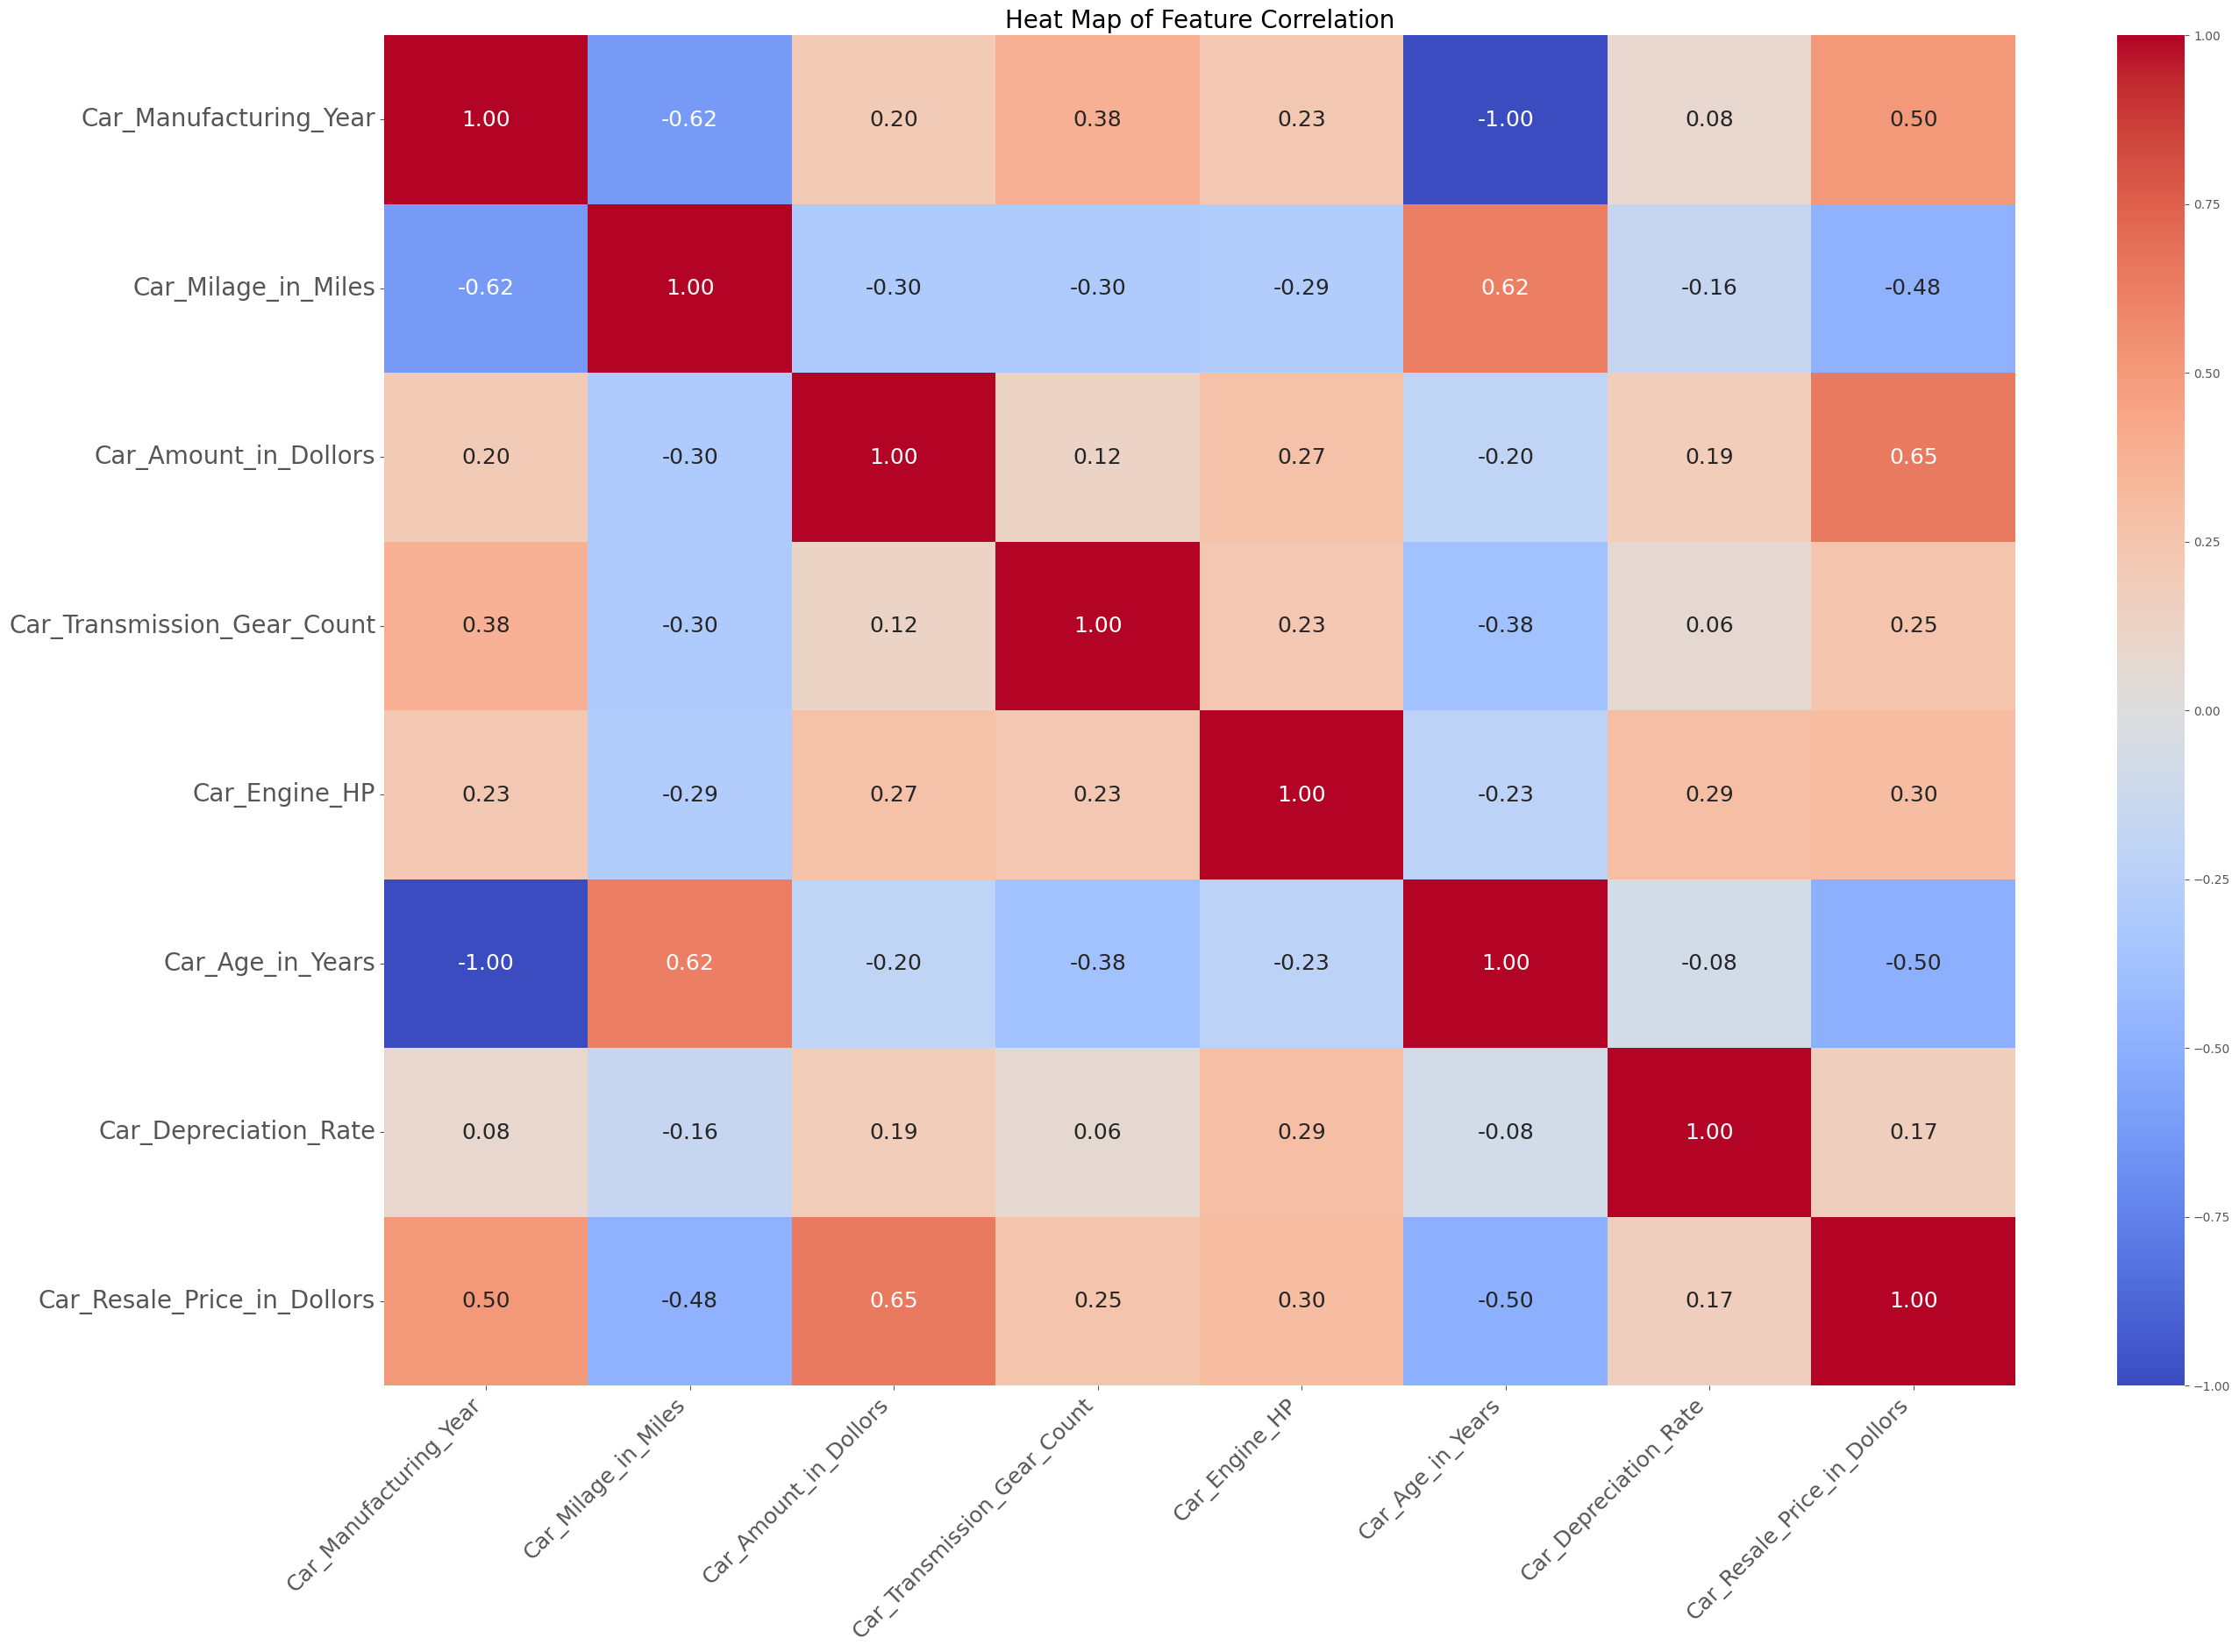

In [162]:
numerical_df_orginal =  df_orginal_dropped[["Car_Manufacturing_Year","Car_Milage_in_Miles",	"Car_Amount_in_Dollors","Car_Transmission_Gear_Count",	"Car_Engine_HP","Car_Age_in_Years","Car_Depreciation_Rate","Car_Resale_Price_in_Dollors"]].corr()
matplot.figure(figsize=(30, 20))
seaborn.heatmap(numerical_df_orginal, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 18})
matplot.title("Heat Map of Feature Correlation",fontsize=20)
matplot.xticks(rotation=45, ha="right", fontsize=18) 
matplot.yticks(rotation=0,fontsize=20)  
matplot.show()

**Checking for Outliers**

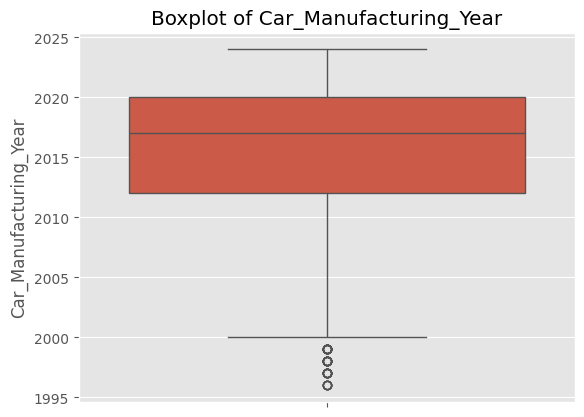

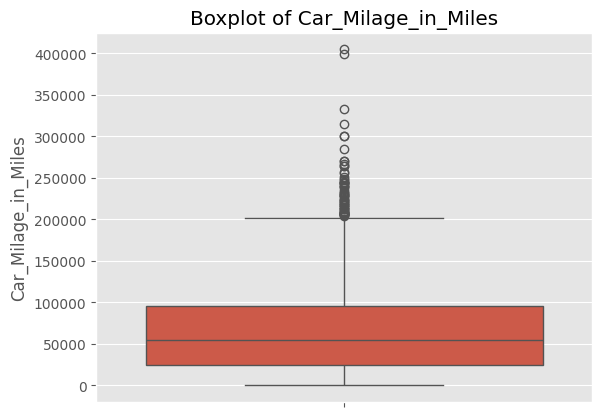

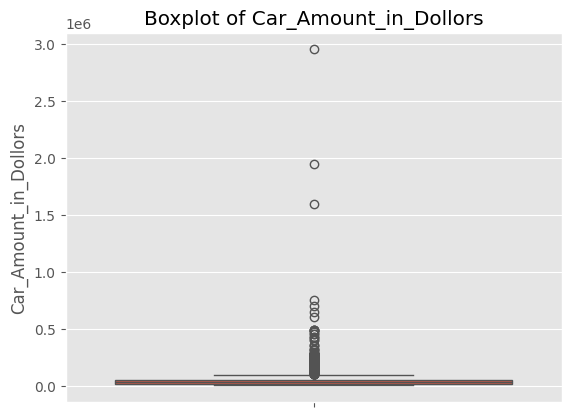

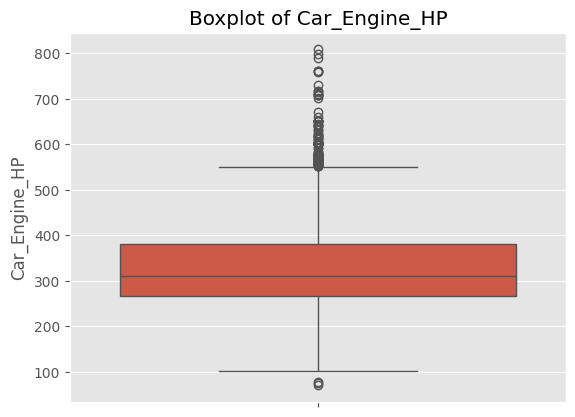

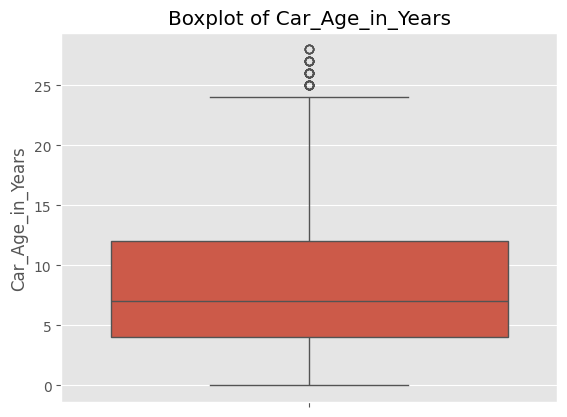

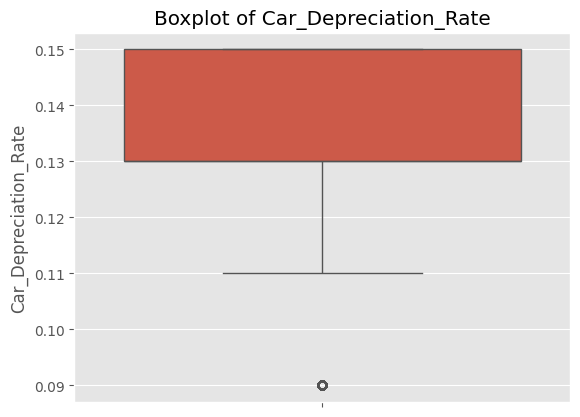

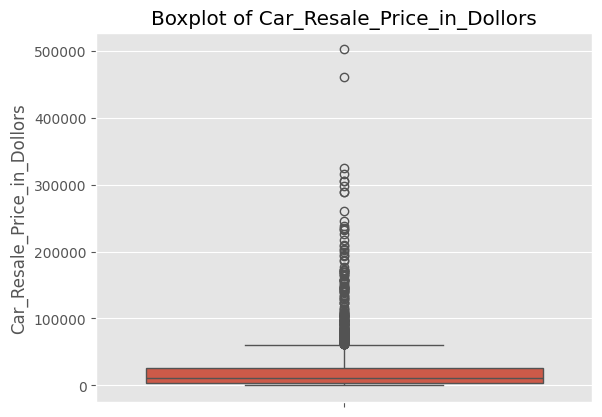

In [88]:
#Using BOX Plot  to visulize outliers

numerical_df_orginal = ["Car_Manufacturing_Year","Car_Milage_in_Miles",	"Car_Amount_in_Dollors",	"Car_Engine_HP","Car_Age_in_Years","Car_Depreciation_Rate","Car_Resale_Price_in_Dollors"]
for var_c in numerical_df_orginal:
    #matplot.figure(figsize=(1, 1))
    seaborn.boxplot(data = df_orginal[var_c])
    matplot.title(f"Boxplot of {var_c}")
    matplot.show()


**Pair-Plot**

<Figure size 640x480 with 0 Axes>

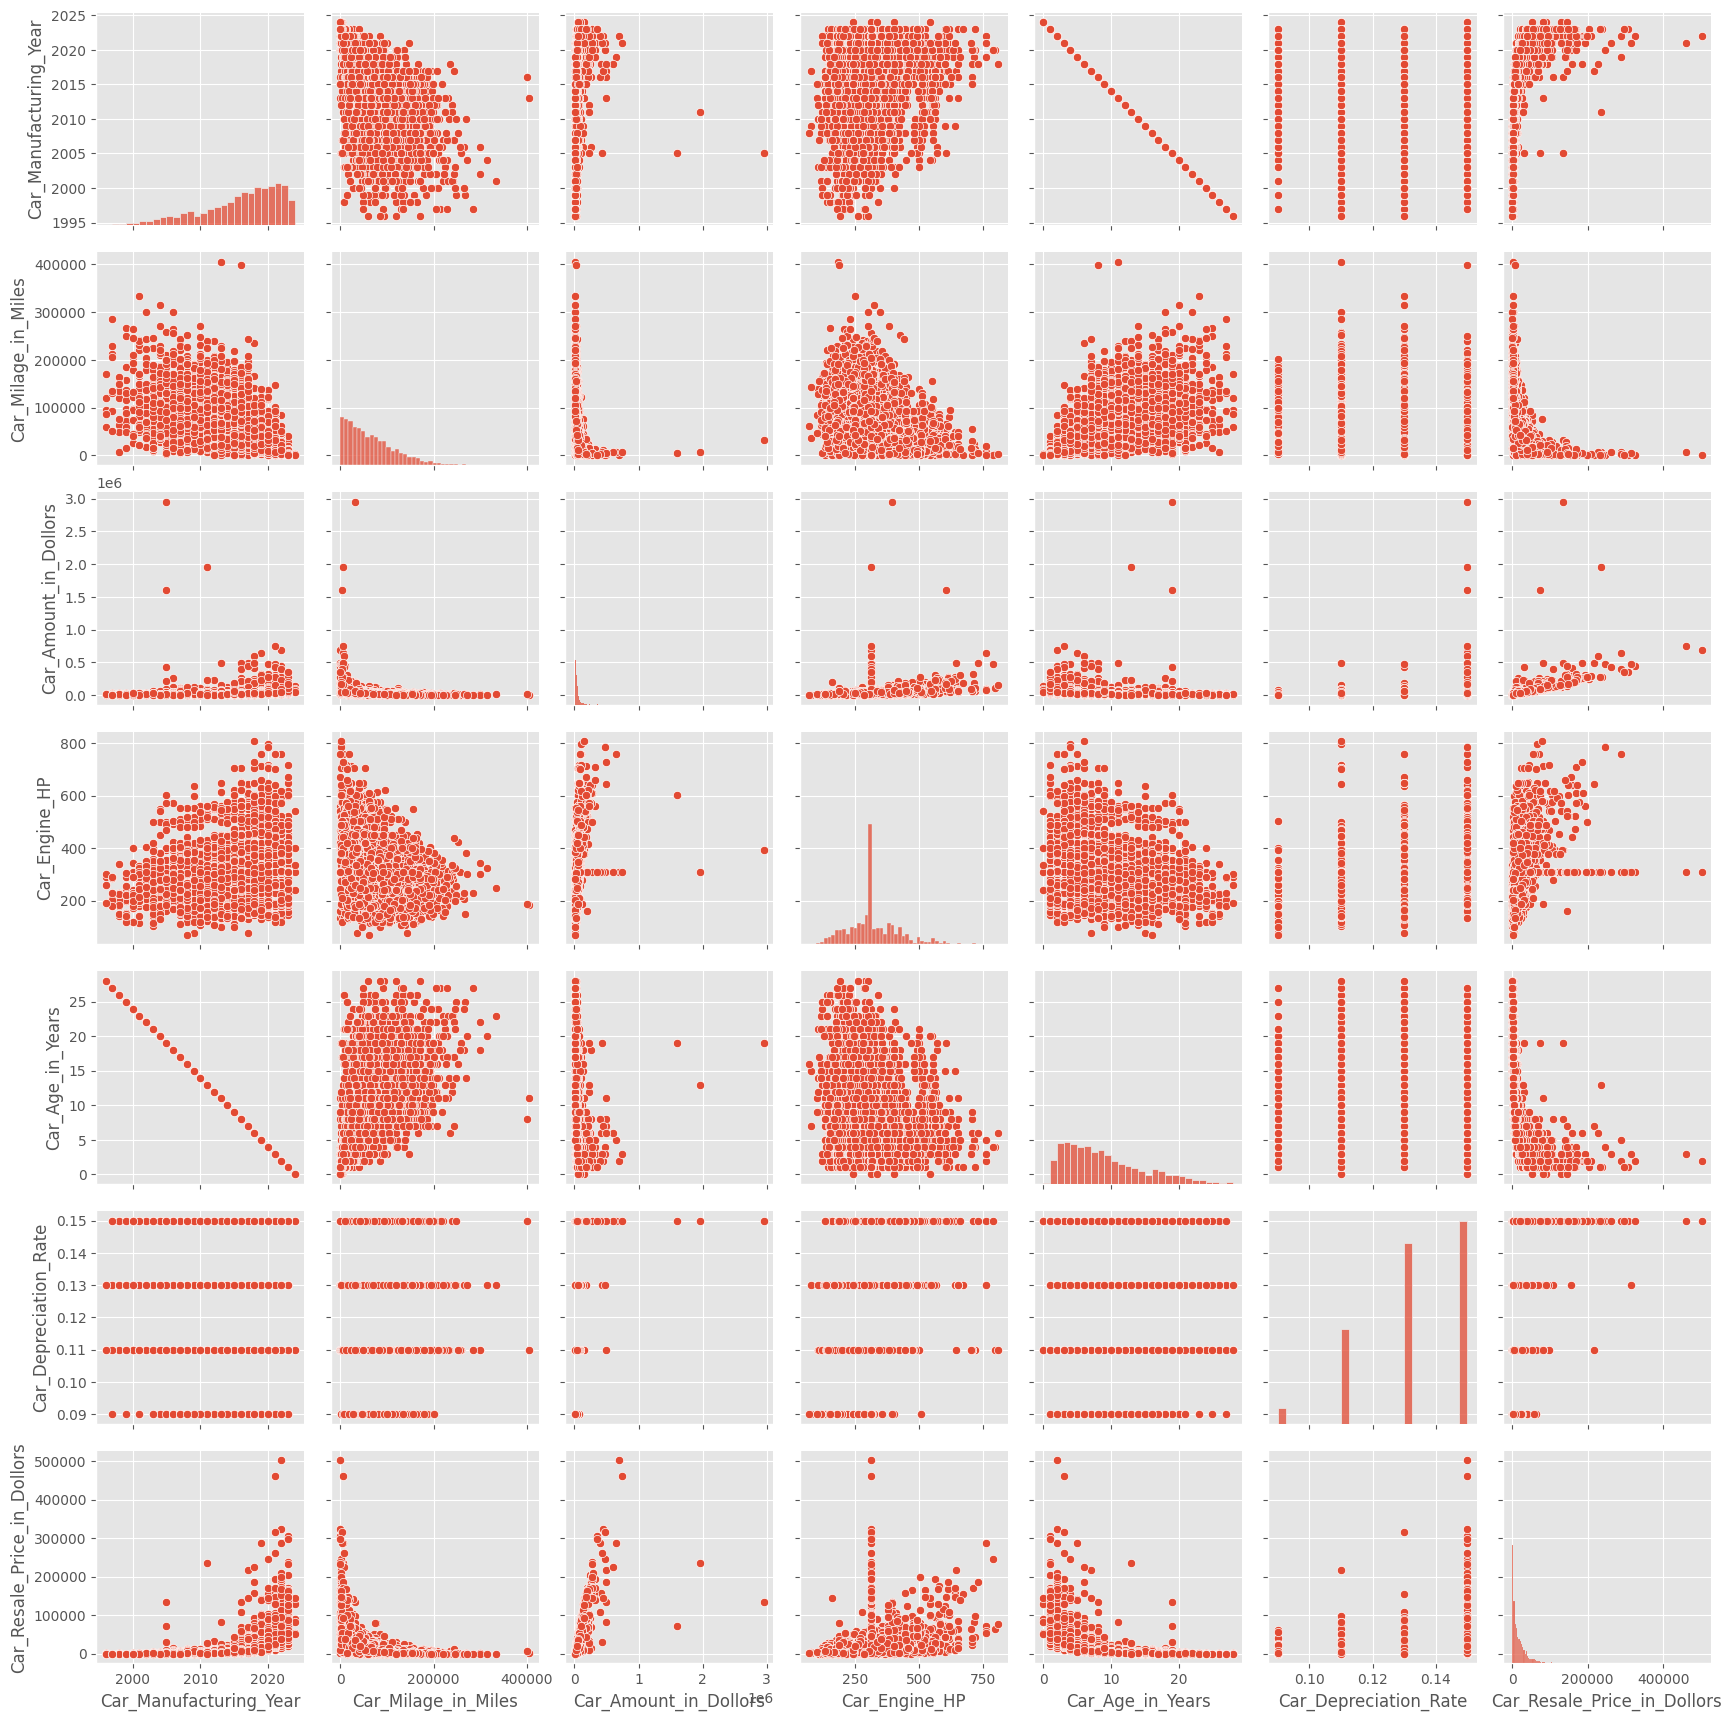

In [90]:
matplot.figure()
seaborn.pairplot(df_orginal[numerical_df_orginal])
matplot.show()

<h2>Answering the Business Questions:</h2>

<span style="color:blue;">
1. What will be the good resale pricing stratergy of Automobile(used car) depending on Car's Ages, depreciation rate as specifed, and Milage in miles?
</span> 

In [93]:
#we use linear regression to analyze the relationship
from sklearn.linear_model import LinearRegression
Selected_feature_X = df_orginal[["Car_Age_in_Years","Car_Depreciation_Rate","Car_Milage_in_Miles"]]
Selected_feature_Y = df_orginal["Car_Resale_Price_in_Dollors"]

Selected_model = LinearRegression().fit(Selected_feature_X,Selected_feature_Y)
print(f"Intercept: {Selected_model.intercept_}")
print(f"Coef: {Selected_model.coef_}")

Intercept: 22309.18807386679
Coef: [-1.86793607e+03  1.88449250e+05 -1.57441408e-01]


As we can see from coef: As longer the age of car and larger the miles car driven,the resale price will be less. So to answer the question company team must set their pricing based on these two values.

<span style="color:blue;">
2. How Accident and title deatils will effect the resale price of the car?
</span> 

In [96]:

Selected_feature_X = df_orginal[["Car_Accident_Details_At least 1 accident or damage reported"]]
Selected_feature_2X = df_orginal[["Car_Title_Details_Yes"]]
Selected_feature_Y = df_orginal["Car_Resale_Price_in_Dollors"]

Selected_model = LinearRegression().fit(Selected_feature_X,Selected_feature_Y)
print("With Accident Detais")
print(f"Intercept: {Selected_model.intercept_}")
print(f"Coef: {Selected_model.coef_}")
print("\n")
print("With Clear Detais")
Selected_model = LinearRegression().fit(Selected_feature_2X,Selected_feature_Y)
print(f"Intercept: {Selected_model.intercept_}")
print(f"Coef: {Selected_model.coef_}")

With Accident Detais
Intercept: 24905.26407079646
Coef: [-15243.20719386]


With Clear Detais
Intercept: 35688.323374340944
Coef: [-17260.17444477]


As we can observe cars having accident have baseline price of 24900 dollors, the more car are met with accident will lower the price. Likewise, cars having clear title have baseline price of 35500 dollors, the more car are rebuilt or slavaged will lower the price.
In nutshell, to answer the question, both the feature will have effect on resale price.

<span style="color:blue;">
3. Which brands and color category of Automobile(used car)'s have the resale value high in average?
</span> 

In [99]:
brand_color_avg_amount = df_orginal.groupby(["Car_Brand_Category","Car_Color_Category"])['Car_Resale_Price_in_Dollors'].mean().reset_index()
brand_color_avg_amount.sort_values(by='Car_Resale_Price_in_Dollors', ascending=False).head(10)

,Car_Brand_Category,Car_Color_Category,Car_Resale_Price_in_Dollors
20,3,Other-Color,41478.094972
21,3,Red,33288.567568
19,3,Blue,26269.275862
18,3,Black,24526.119101
23,3,White,23391.706989
13,2,Blue,19218.804348
6,1,Black,18017.606936
11,1,White,17915.830189
8,1,Other-Color,17550.777778
14,2,Other-Color,17342.321767


<span style="color:blue;">
4. What Color of car is most popular and average resale price?
</span> 

In [101]:

popularcolor_count = df_orginal['Car_Color_Category'].value_counts()


price_and_color = df_orginal.groupby('Car_Color_Category')['Car_Resale_Price_in_Dollors'].mean().reset_index()


print(popularcolor_count)
print(price_and_color)

Car_Color_Category
Black          976
Other-Color    892
White          871
Silver         399
Blue           368
Red            286
Name: count, dtype: int64
  Car_Color_Category  Car_Resale_Price_in_Dollors
0              Black                 20580.859631
1               Blue                 20323.029891
2        Other-Color                 26639.267937
3                Red                 19339.251748
4             Silver                 13964.395990
5              White                 19827.484501


<span style="color:blue;">
4. How Engine Horsepower of cars influnce resale price?
</span> 

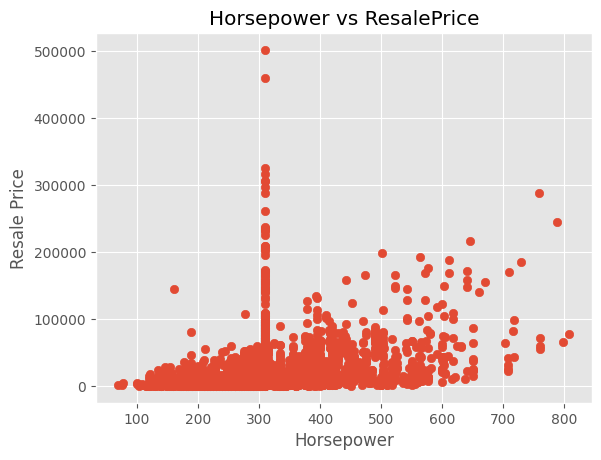

In [103]:
matplot.scatter(df_orginal['Car_Engine_HP'], df_orginal['Car_Resale_Price_in_Dollors'])
matplot.xlabel("Horsepower")
matplot.ylabel("Resale Price")
matplot.title("Horsepower vs ResalePrice")
matplot.show()


<span style="color:blue;">5. Which model year cars have high resale price?

In [105]:
cars_feature_model= df_orginal.groupby(['Car_Manufacturing_Year'])["Car_Resale_Price_in_Dollors"].sum().sort_values(ascending=False)
print(f"\n {cars_feature_model}\n")


 Car_Manufacturing_Year
2022    16078124
2021    13905897
2023    13767861
2020     9772494
2019     6883587
2018     6152193
2017     3677530
2016     2851775
2015     1783843
2014      978905
2013      822995
2011      578255
2024      549485
2012      457238
2005      322948
2010      252698
2008      227205
2009      175368
2007      163832
2006      121751
2004       55237
2003       52622
2001       25561
2002       21021
2000        8150
1999        5251
1998        3504
1997        2729
1996        2521
Name: Car_Resale_Price_in_Dollors, dtype: int64



<span style="color:blue;">6. What is the most common fuel type of the  cars have high resale price?

In [107]:
cars_feature_fuel= df_orginal.groupby(['Car_Fuel_Type'])["Car_Resale_Price_in_Dollors"].sum().sort_values(ascending=False)
print(f"\n {cars_feature_fuel}\n")


 Car_Fuel_Type
Gasoline          68226784
Hybrid             6639679
Diesel             2886879
E85 Flex Fuel      1010134
Plug-In Hybrid      937104
Name: Car_Resale_Price_in_Dollors, dtype: int64



**Conclusion:**


This EDA revealed clear pricing patterns in used cars:
- Diesel cars tend to have higher resale prices than petrol vehicles
- Manual transmission dominates the market but shows lower average pricing
- Brands like Toyota and Honda maintain stronger value retention

These insights can support better pricing strategies for dealerships based on car attributes.
